## Load and inspect

In [22]:
import pandas as pd

df = pd.read_csv('data/raw_analyst_ratings.csv')
df.head()
# df.info()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [27]:
unique_stocks = df['stock'].dropna().unique()
print(f"Total unique tickers: {len(unique_stocks)}")
print(sorted(unique_stocks))  # Sorted alphabetically



Total unique tickers: 6204
['A', 'AA', 'AAC', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAU', 'AAV', 'AAVL', 'AAWW', 'AAXJ', 'AB', 'ABAC', 'ABAX', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCD', 'ABCO', 'ABCW', 'ABDC', 'ABEV', 'ABG', 'ABGB', 'ABIO', 'ABM', 'ABMD', 'ABR', 'ABTL', 'ABX', 'ABY', 'ACAD', 'ACAS', 'ACAT', 'ACC', 'ACCO', 'ACCU', 'ACE', 'ACET', 'ACFC', 'ACFN', 'ACG', 'ACGL', 'ACH', 'ACHC', 'ACHN', 'ACIW', 'ACLS', 'ACM', 'ACMP', 'ACN', 'ACNB', 'ACOR', 'ACP', 'ACPW', 'ACRE', 'ACRX', 'ACSF', 'ACST', 'ACT', 'ACTA', 'ACTG', 'ACTS', 'ACU', 'ACUR', 'ACWI', 'ACWV', 'ACWX', 'ACXM', 'ACY', 'ADAT', 'ADBE', 'ADC', 'ADEP', 'ADES', 'ADGE', 'ADHD', 'ADI', 'ADK', 'ADM', 'ADMA', 'ADMP', 'ADMS', 'ADNC', 'ADP', 'ADPT', 'ADRA', 'ADRD', 'ADRE', 'ADRU', 'ADS', 'ADSK', 'ADT', 'ADTN', 'ADVS', 'ADX', 'ADXS', 'ADZ', 'AE', 'AEB', 'AEC', 'AEE', 'AEG', 'AEGN', 'AEGR', 'AEHR', 'AEIS', 'AEL', 'AEM', 'AEO', 'AEPI', 'AER', 'AERI', 'AES', 'AET', 'AETI', 'AEY', 'AEZS', 'AF', 'AFA', 'AFAM', 'AF

## Textual Lengths (Headline or Summary)

In [33]:
df['headline_length'] = df['headline'].apply(len)

# Basic statistics
headline_stats = df['headline_length'].describe()
print("📊 Headline Length Statistics:")
print(headline_stats)

📊 Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [34]:
# Ensure publisher column exists
df['publisher'] = df['publisher'].astype(str)

# Count articles per publisher
publisher_counts = df['publisher'].value_counts()
print("\n📰 Top Publishers by Article Count:")
print(publisher_counts.head(10))



📰 Top Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [10]:
df['text_length'] = df['headline'].astype(str).apply(len)
df['word_count'] = df['headline'].astype(str).apply(lambda x: len(x.split()))
print(df[['text_length', 'word_count']].describe())


        text_length    word_count
count  1.407328e+06  1.407328e+06
mean   7.312051e+01  1.141671e+01
std    4.073531e+01  6.352997e+00
min    3.000000e+00  1.000000e+00
25%    4.700000e+01  7.000000e+00
50%    6.400000e+01  1.000000e+01
75%    8.700000e+01  1.300000e+01
max    5.120000e+02  7.700000e+01


## Articles per Publisher

<Axes: title={'center': 'Top 10 Publishers'}, xlabel='publisher'>

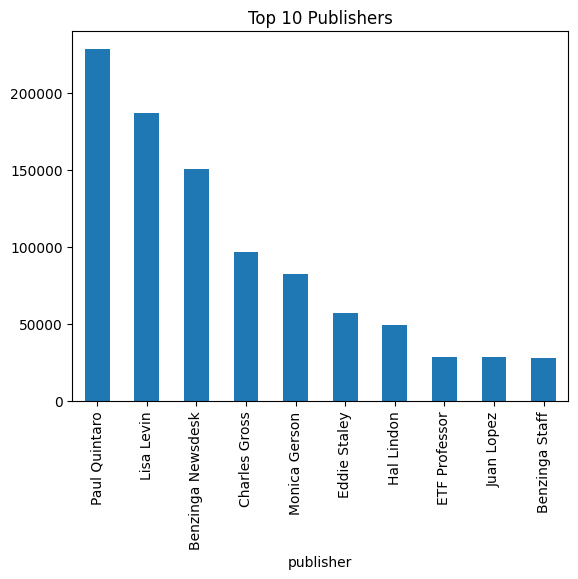

In [ ]:
df['publisher'].value_counts().head(10).plot(kind='bar', title='Top 10 Publishers')


## Publication Dates

/tmp/ipykernel_12187/2665635264.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


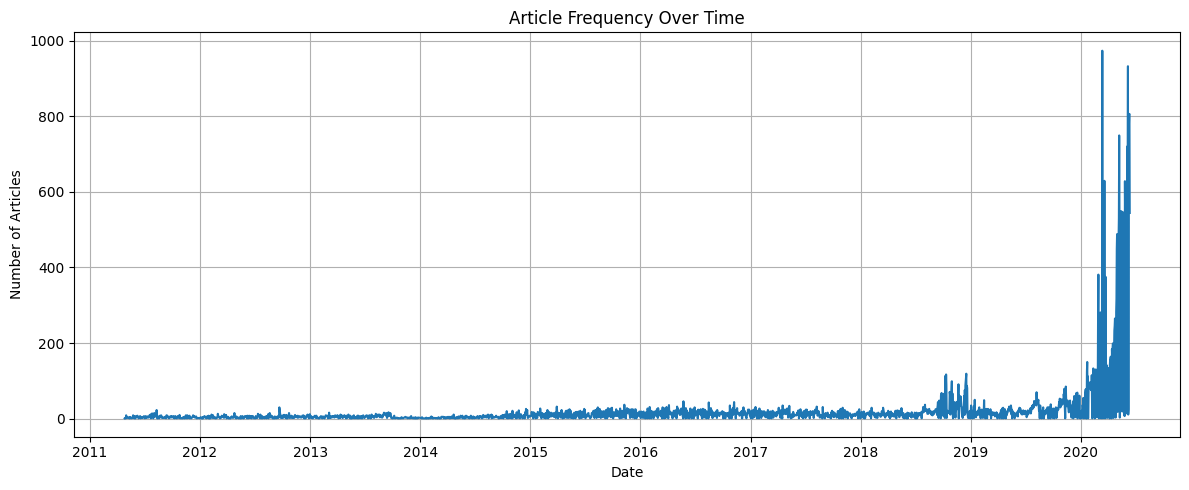

In [43]:
import matplotlib.pyplot as plt

# Convert publication date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop nulls after conversion
df = df.dropna(subset=['date'])

# Group by date
articles_per_day = df.groupby(df['date'].dt.date).size()

# Line plot
articles_per_day.plot(figsize=(12, 5), title="Article Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()


stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
NFLX    3028
M       3025
EBAY    3018
GILD    2968
VZ      2966
QCOM    2941
JNJ     2928
DAL     2926
BABA    2858
KO      2797
AA      2739
EWU     2702
ORCL    2701
FDX     2629
HD      2612
Name: count, dtype: int64


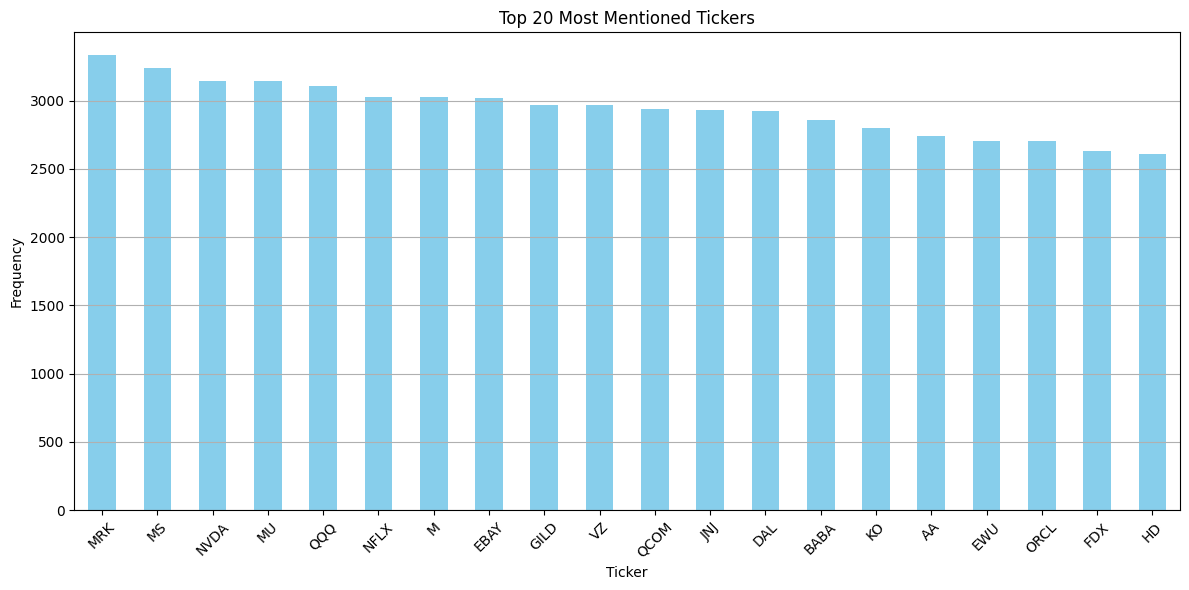

In [29]:
import matplotlib.pyplot as plt

# Top 20 most frequently mentioned tickers
stock_counts = df['stock'].value_counts().head(20)
print(stock_counts)


stock_counts.head(20).plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Top 20 Most Mentioned Tickers')
plt.xlabel('Ticker')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Publication Date Trends


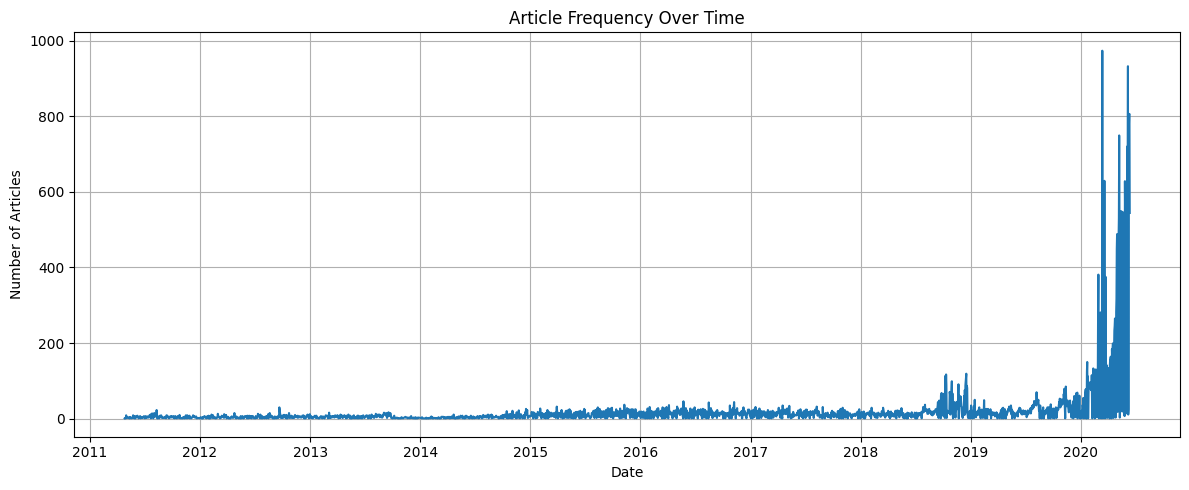

In [45]:
# Convert publication date to datetime
df['published_date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop nulls after conversion
df = df.dropna(subset=['published_date'])

# Group by date
articles_per_day = df.groupby(df['published_date'].dt.date).size()

# Line plot
articles_per_day.plot(figsize=(12, 5), title="Article Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()

# Text Analysis (Topic Modeling)

## Topic Modeling using LDA

In [ ]:
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.feature_extraction.text import CountVectorizer

# count_vect = CountVectorizer(stop_words='english', max_features=1000)
# dtm = count_vect.fit_transform(df['clean_headline'])
# lda = LatentDirichletAllocation(n_components=5, random_state=42)
# lda.fit(dtm)

# # Display top 10 words for each topic
# for idx, topic in enumerate(lda.components_):
#     print(f"Topic #{idx+1}:")
#     print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


KeyError: 'clean_headline'

# Time Series Analysis
## Frequency Over Time

<Axes: title={'center': 'Daily Analyst Ratings Frequency'}, xlabel='date'>

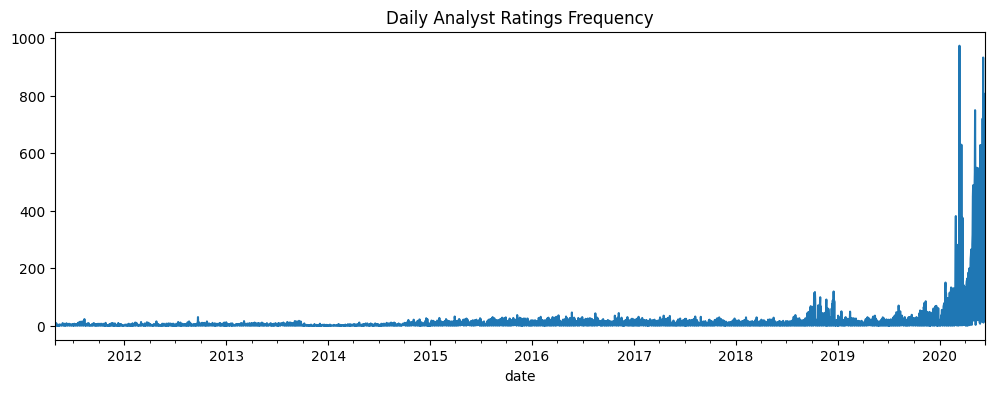

In [15]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.set_index('date', inplace=True)
df.resample('D').size().plot(title='Daily Analyst Ratings Frequency', figsize=(12, 4))


## Hourly Patterns (If Time Exists)

In [16]:
if 'time' in df.columns:
    df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'], errors='coerce')
    df['hour'] = df['datetime'].dt.hour
    df['hour'].value_counts().sort_index().plot(kind='bar', title='Ratings by Hour')


# Publisher Analysis
## Top Publishers

<Axes: title={'center': 'Top 10 Most Active Publishers'}, ylabel='publisher'>

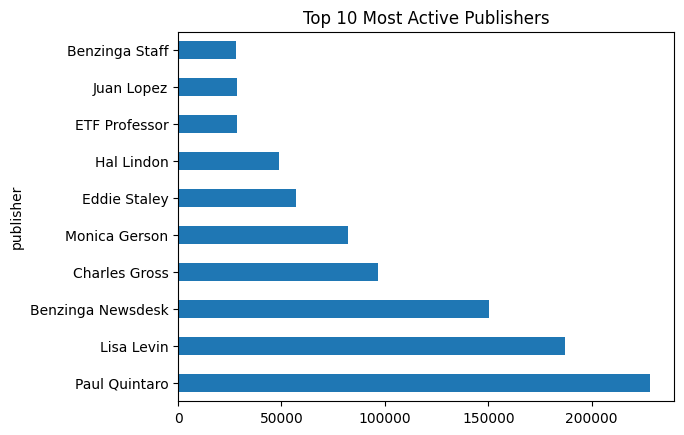

In [17]:
top_publishers = df['publisher'].value_counts().head(10)
top_publishers.plot(kind='barh', title='Top 10 Most Active Publishers')


## Ratings by Publisher

In [18]:
if 'rating' in df.columns:
    pd.crosstab(df['publisher'], df['rating']).sort_values(by='Buy', ascending=False).head(10).plot(
        kind='bar', stacked=True, figsize=(12, 6), title='Rating Type per Publisher')


## Email Domain Analysis

<Axes: title={'center': 'Top Publisher Email Domains'}, xlabel='domain'>

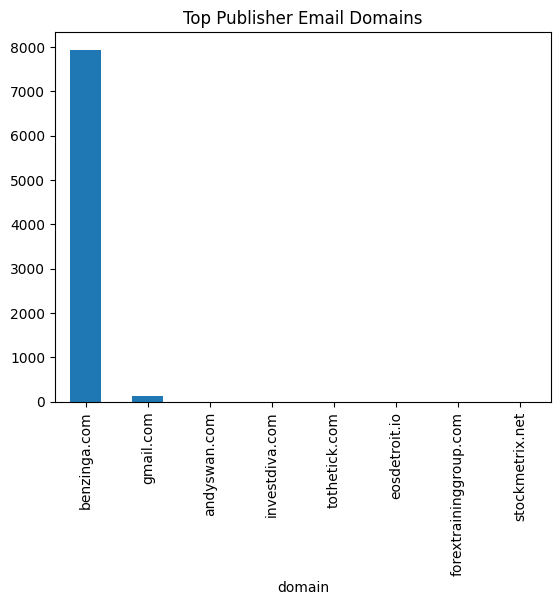

In [19]:
df['domain'] = df['publisher'].str.extract(r'@([\w\.-]+)')
df['domain'].value_counts().head(10).plot(kind='bar', title='Top Publisher Email Domains')


## Sentiment or Rating Trends Over Time

In [20]:
if 'rating' in df.columns:
    df.groupby([df.index.date, 'rating']).size().unstack().plot(figsize=(12, 5), title='Ratings Over Time')


In [21]:
# Make sure 'symbol' column exists
if 'symbol' in df.columns:
    unique_symbols = df['symbol'].dropna().unique()
    print(f"Total unique symbols: {len(unique_symbols)}")
    print(sorted(unique_symbols))  # sorted for better readability
else:
    print("The 'symbol' column is not found in the DataFrame.")


The 'symbol' column is not found in the DataFrame.
